In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

netflix_df=pd.read_csv(r'C:\Users\USER\udemy\Netflix_Userbase.csv')

In [5]:
#How many rows and columns are in the dataset?
netflix_df.shape

(2500, 10)

In [6]:
#What are the data types of each column?
netflix_df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [7]:
#Are there any missing values in the dataset? If so, in which columns?
netflix_df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [8]:
#What is the distribution of users by country?
user_dist=netflix_df.groupby('Country')['User ID'].count()
user_dist

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64

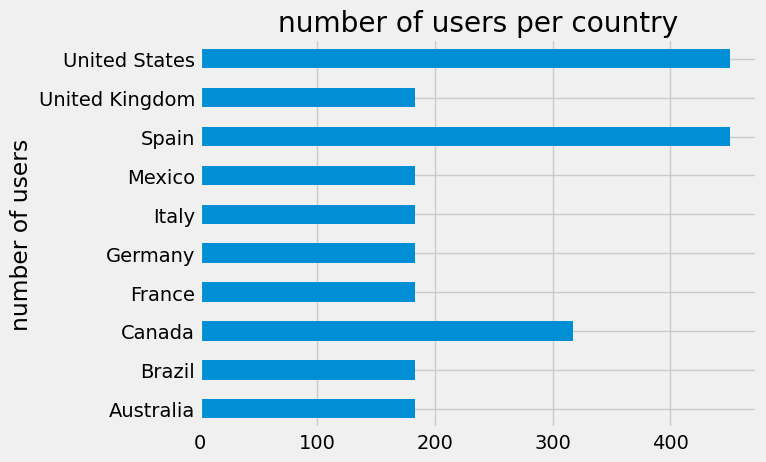

In [9]:
#Create a bar chart showing the number of users per country.
user_dist.plot(kind='barh')
plt.title('number of users per country')
plt.ylabel('number of users')
plt.savefig(r'C:\Users\USER\udemy\figures\number of users per country.png')
plt.show()

In [10]:
#How many unique values are there in each categorical column?
unique_values = netflix_df.select_dtypes(include=['object', 'category']).nunique()
unique_values

Subscription Type      3
Join Date            300
Last Payment Date     26
Country               10
Gender                 2
Device                 4
Plan Duration          1
dtype: int64

In [11]:
#What is the most common subscription plan among users?
most_common_subscription_plan=netflix_df.groupby('Subscription Type')['User ID'].count()
most_common_subscription_plan
#most_common_subscription_plan.nlargest(1)

Subscription Type
Basic       999
Premium     733
Standard    768
Name: User ID, dtype: int64

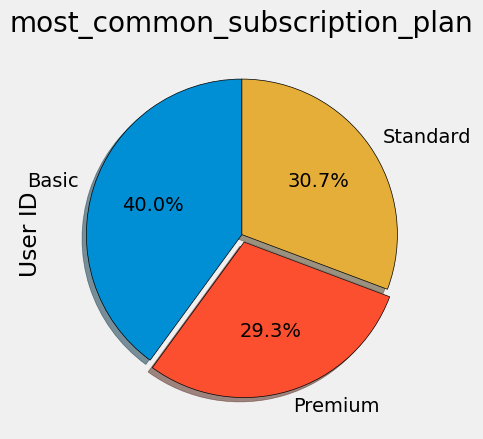

In [12]:
import matplotlib.pyplot as plt
#Generate a pie chart to visualize the distribution of subscription plans
explode=[0,0.05,0]
most_common_subscription_plan.plot(kind='pie', wedgeprops={'edgecolor':'black'}, 
                                  startangle=90, shadow=True, autopct='%1.1f%%', 
                                   explode=explode)
#plt.ylabel('No. of Users')
plt.title('most_common_subscription_plan')
plt.savefig(r'C:\Users\USER\udemy\figures\distribution of subscription plans.png')
plt.show()

In [13]:
#What is the average age of users?
av_age_of_user=netflix_df['Age'].mean()
av_age_of_user

np.float64(38.7956)

In [14]:
#and what is the age distribution?
age_dist=netflix_df['Age'].describe()
age_dist

count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: Age, dtype: float64

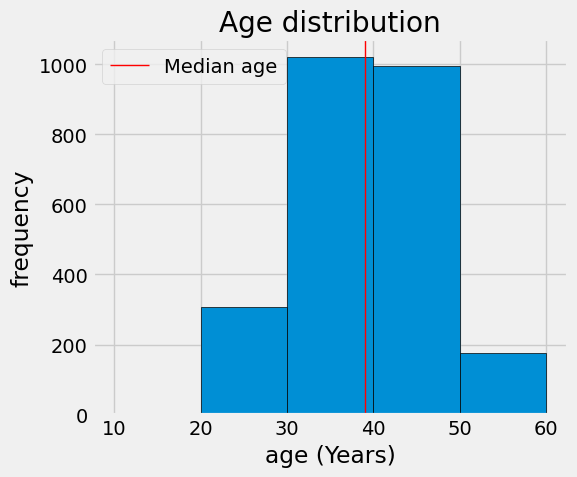

In [15]:
#age distribution visualization
plt.figure(figsize=(6,5))

bins=np.arange(10,70,10)
ages=netflix_df['Age']
plt.hist(ages, bins=bins, edgecolor='k')
plt.title('Age distribution')
plt.xlabel('age (Years)')
plt.ylabel('frequency')

median_age=ages.median()
plt.axvline(median_age, color='red', linewidth=1, label='Median age')
plt.legend()
plt.tight_layout()

plt.savefig(r'C:\Users\USER\udemy\figures\Netflix_age_dist')

In [16]:
#What is the average, median, and standard deviation of user ages?
netflix_df['Age'].agg(['mean','median','std'])

mean      38.795600
median    39.000000
std        7.171778
Name: Age, dtype: float64

In [17]:
#How does the average monthly subscription fee vary across different countries?
Av_month_sub_fee_by_count=netflix_df.groupby('Country')['Monthly Revenue'].mean().sort_values(ascending=False)
Av_month_sub_fee_by_count

Country
United Kingdom    12.666667
Italy             12.661202
France            12.606557
United States     12.558758
Spain             12.554324
Brazil            12.486339
Canada            12.460568
Australia         12.409836
Germany           12.349727
Mexico            12.224044
Name: Monthly Revenue, dtype: float64

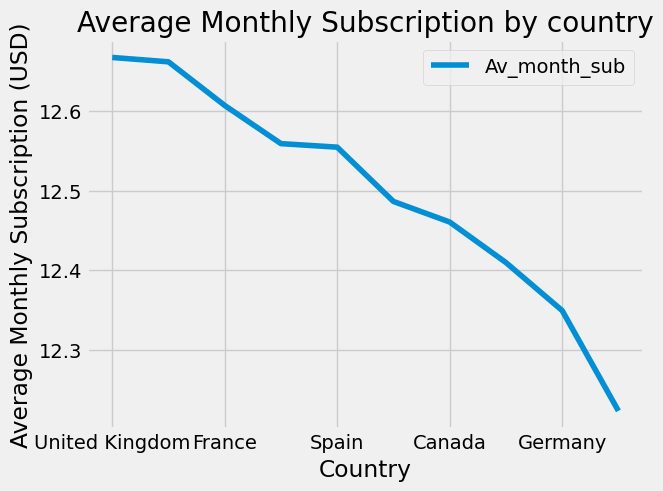

In [18]:
#How does the average monthly subscription fee vary across different countries? (VISUALIZATION)
Av_month_sub_fee_by_count.plot(kind='line', label='Av_month_sub')
plt.ylabel('Average Monthly Subscription (USD)')
plt.title('Average Monthly Subscription by country')
plt.legend()
plt.savefig(r'C:\Users\USER\udemy\figures\Average Monthly Subscription by country.png')
plt.show()

In [19]:
netflix_df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [20]:
#What is the trend in new user sign-ups over the months/years?
netflix_df['Join Date']=pd.to_datetime(netflix_df['Join Date'], format='%d-%m-%y')
netflix_df['Last Payment Date']=pd.to_datetime(netflix_df['Last Payment Date'], format='%d-%m-%y')

In [21]:
netflix_df.dtypes

User ID                       int64
Subscription Type            object
Monthly Revenue               int64
Join Date            datetime64[ns]
Last Payment Date    datetime64[ns]
Country                      object
Age                           int64
Gender                       object
Device                       object
Plan Duration                object
dtype: object

In [22]:
#What is the trend in new user sign-ups over the months?
netflix_df['Monthly']=netflix_df['Join Date'].dt.to_period('M')
monthly_sub_trend=netflix_df.groupby('Monthly')['User ID'].count()
monthly_sub_trend

Monthly
2021-09      3
2021-10      3
2021-11      4
2021-12      4
2022-01      8
2022-02      5
2022-03     13
2022-04     19
2022-05     40
2022-06    295
2022-07    481
2022-08    382
2022-09    367
2022-10    521
2022-11    295
2022-12     22
2023-01     12
2023-02      7
2023-03      6
2023-04      5
2023-05      5
2023-06      3
Freq: M, Name: User ID, dtype: int64

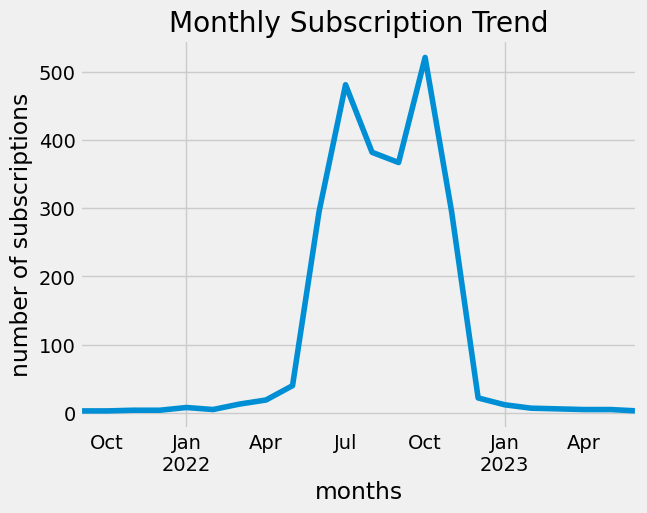

In [23]:
#What is the trend in new user sign-ups over the months? (VISUALIZATION)
monthly_sub_trend.plot(label='sub_trend')
plt.title('Monthly Subscription Trend')
plt.ylabel('number of subscriptions')
plt.xlabel('months')
plt.savefig(r'C:\Users\USER\udemy\figures\Monthly Subscription Trend.png')
plt.show()

In [24]:
#What is the trend in new user sign-ups over the years?
netflix_df['Yearly']=netflix_df['Join Date'].dt.to_period('Y')
yearly_sub_trend=netflix_df.groupby('Yearly')['User ID'].count()
yearly_sub_trend

Yearly
2021      14
2022    2448
2023      38
Freq: Y-DEC, Name: User ID, dtype: int64

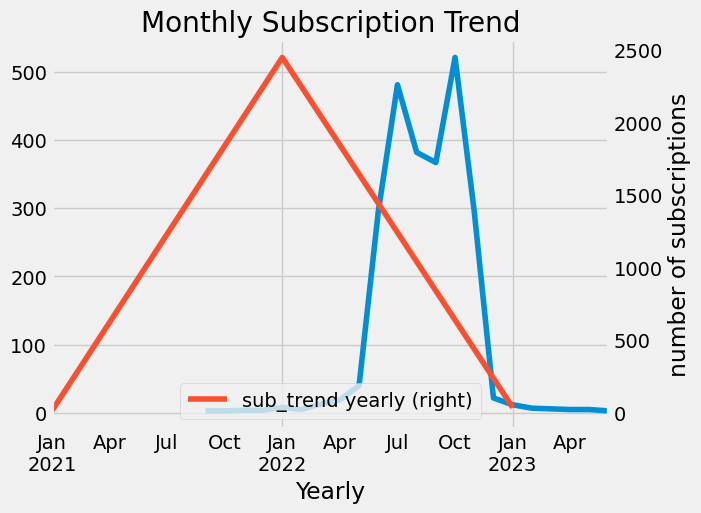

In [25]:
#What is the trend in new user sign-ups over the months/years? (VISUALIZATION)
monthly_sub_trend.plot(label='sub_trend monthly')
yearly_sub_trend.plot(label='sub_trend yearly', secondary_y=True)
plt.title('Monthly Subscription Trend')
plt.ylabel('number of subscriptions')
plt.xlabel('months')
plt.legend()

In [26]:
netflix_df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'Monthly', 'Yearly'],
      dtype='object')

In [27]:

#Do users in certain countries tend to choose higher-tier plans more often?
plan_distribution=netflix_df.groupby(['Country','Subscription Type'])['User ID'].count()
plan_distribution


Country         Subscription Type
Australia       Basic                 31
                Premium              101
                Standard              51
Brazil          Basic                146
                Premium               33
                Standard               4
Canada          Basic                145
                Premium               88
                Standard              84
France          Basic                 36
                Premium              147
Germany         Basic                149
                Premium                3
                Standard              31
Italy           Basic                176
                Premium                4
                Standard               3
Mexico          Basic                  4
                Standard             179
Spain           Basic                110
                Premium              212
                Standard             129
United Kingdom  Basic                  3
                Standar

In [28]:
total_users_per_country = netflix_df.groupby('Country')['User ID'].count()
total_users_per_country

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64

In [29]:
high_tier_users=netflix_df[netflix_df['Subscription Type'].isin(['Premium','Standard'])].groupby('Country')['User ID'].count()
high_tier_users.reset_index(name='Number of users')

,Country,Number of users
0,Australia,152
1,Brazil,37
2,Canada,172
3,France,147
4,Germany,34
5,Italy,7
6,Mexico,179
7,Spain,341
8,United Kingdom,180
9,United States,252


In [30]:
high_tier_percentage=((high_tier_users/total_users_per_country)*100).fillna(0).sort_values(ascending=False)
high_tier_percentage.reset_index(name='% of users')

,Country,% of users
0,United Kingdom,98.360656
1,Mexico,97.814208
2,Australia,83.060109
3,France,80.327869
4,Spain,75.609756
5,United States,55.875831
6,Canada,54.258675
7,Brazil,20.218579
8,Germany,18.579235
9,Italy,3.825137


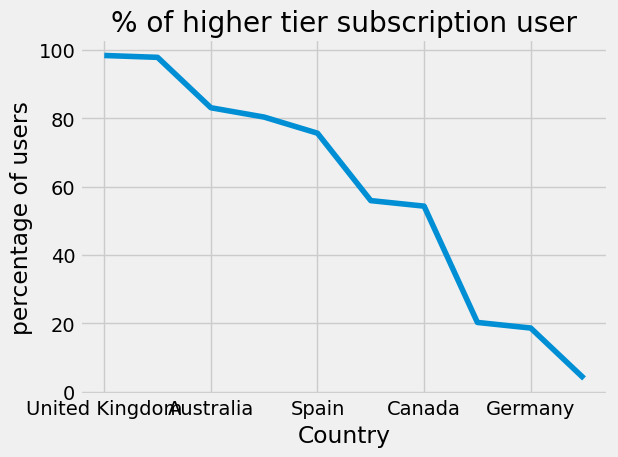

In [31]:
high_tier_percentage.plot()
plt.ylabel('percentage of users')
plt.title('% of higher tier subscription user')
plt.tight_layout()
plt.savefig(r'C:\Users\USER\udemy\figures\% of higher tier subscription user')
plt.show()

In [32]:

#users in Italy and Brazil have a higher proportion of higher tier subscription plans
#this confirms that certain countries have user which favor higher tier plans

In [33]:
netflix_df.dtypes

User ID                       int64
Subscription Type            object
Monthly Revenue               int64
Join Date            datetime64[ns]
Last Payment Date    datetime64[ns]
Country                      object
Age                           int64
Gender                       object
Device                       object
Plan Duration                object
Monthly                   period[M]
Yearly                period[Y-DEC]
dtype: object

In [34]:
#correlation between age and subscription
correlation=netflix_df['Age'].corr(netflix_df['Monthly Revenue'])
correlation

np.float64(-0.02114326407144741)

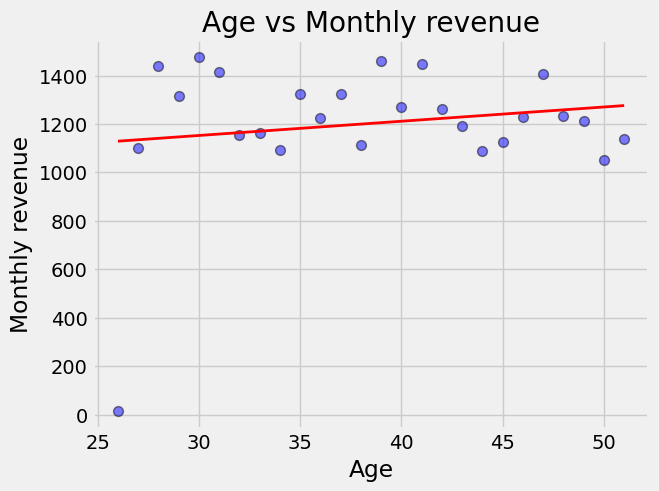

In [58]:
mra=netflix_df.groupby('Age')['Monthly Revenue'].sum()
mra=mra.reset_index()
mra

age=mra['Age']
revenue=mra['Monthly Revenue']

#plt.scatter(age, revenue, edgecolor='k', alpha=0.75)
#plt.yscale('log')
m, c = np.polyfit(age, revenue, 1)  # Fit a linear trend line
plt.scatter(age, revenue, color="blue", alpha=0.5, edgecolor='k',
           linewidth=1, s=50)
plt.plot(age, m*age + c, color="red", linewidth=2)  # Regression line

plt.title('Age vs Monthly revenue')
plt.xlabel('Age')
plt.ylabel('Monthly revenue')
plt.savefig(r'C:\Users\USER\udemy\netflix_age_month', dpi=300)
plt.show()


In [32]:
#there is a -ve correlation between Age and Subscription meaning 
#that younger people are more likely to pay for higher tier packages

In [33]:
#What is the highest subscription fee in the dataset?
sub_fee_max=netflix_df['Monthly Revenue'].max()
sub_fee_max

np.int64(15)

In [34]:
#What is the lowest subscription fee in the dataset?
sub_fee_min=netflix_df['Monthly Revenue'].min()
sub_fee_min

np.int64(10)

In [35]:
#What percentage of users have an active subscription?
netflix_df['Last Payment Date'].max()

Timestamp('2023-07-15 00:00:00')

In [36]:
#active subscription should be those who's payment => last day of the month prio
active_sub_pay_date=pd.to_datetime('2023-06-30')

In [37]:
active_subs=netflix_df[netflix_df['Last Payment Date']>=active_sub_pay_date]


In [38]:
percen_users_active_sub=(len(active_subs)/len(netflix_df)*100)
percen_users_active_sub

70.67999999999999

In [39]:
#How has the number of users changed over time (e.g., based on registration date)?
users_over_time=netflix_df.groupby('Join Date')['User ID'].size().sort_values(ascending=False)
users_over_time.reset_index(name='Number of Users')

,Join Date,Number of Users
0,2022-11-05,33
1,2022-06-30,31
2,2022-07-16,30
3,2022-07-17,29
4,2022-11-04,29
...,...,...
295,2022-04-16,1
296,2022-04-12,1
297,2022-04-04,1
298,2022-04-03,1


Text(0.5, 1.0, 'Trend in no. of users over time')

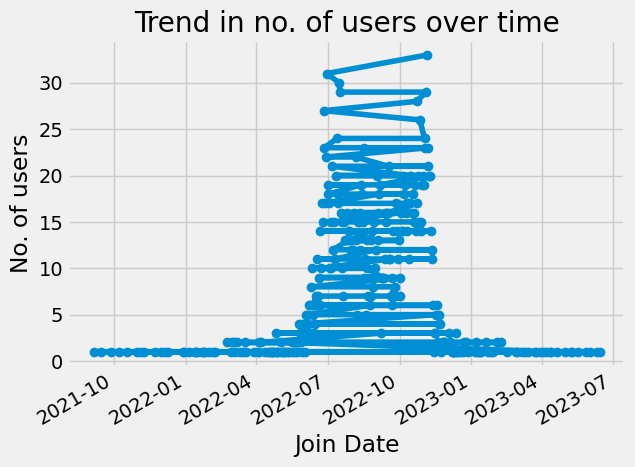

In [40]:
users_over_time.plot(marker='o')
plt.ylabel('No. of users')
plt.title('Trend in no. of users over time')

In [41]:
netflix_df['Reg Month']=netflix_df['Join Date'].dt.to_period('M')

In [42]:
netflix_df.groupby('Reg Month')['User ID'].count()

Reg Month
2021-09      3
2021-10      3
2021-11      4
2021-12      4
2022-01      8
2022-02      5
2022-03     13
2022-04     19
2022-05     40
2022-06    295
2022-07    481
2022-08    382
2022-09    367
2022-10    521
2022-11    295
2022-12     22
2023-01     12
2023-02      7
2023-03      6
2023-04      5
2023-05      5
2023-06      3
Freq: M, Name: User ID, dtype: int64

<Axes: xlabel='Reg Month'>

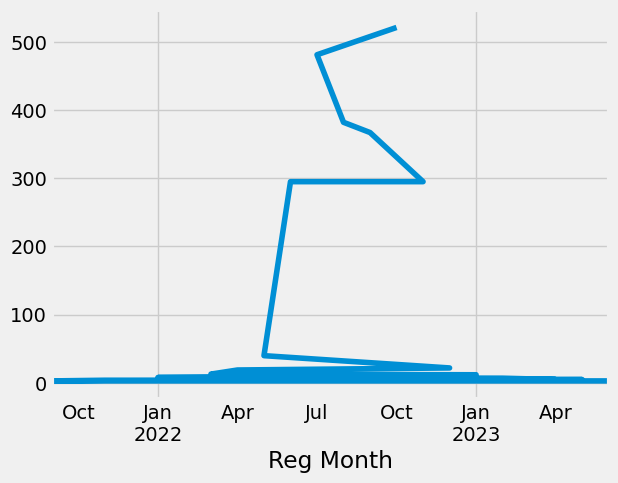

In [43]:
users_over_time=netflix_df.groupby('Reg Month')['User ID'].size().sort_values(ascending=False)
users_over_time.plot()

In [44]:
#How do subscription preferences differ across different countries?
sub_pref_by_country=netflix_df.groupby('Country')['Subscription Type'].count()
sub_pref_by_country.sort_values()

Country
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Canada            317
Spain             451
United States     451
Name: Subscription Type, dtype: int64

<Axes: xlabel='Country'>

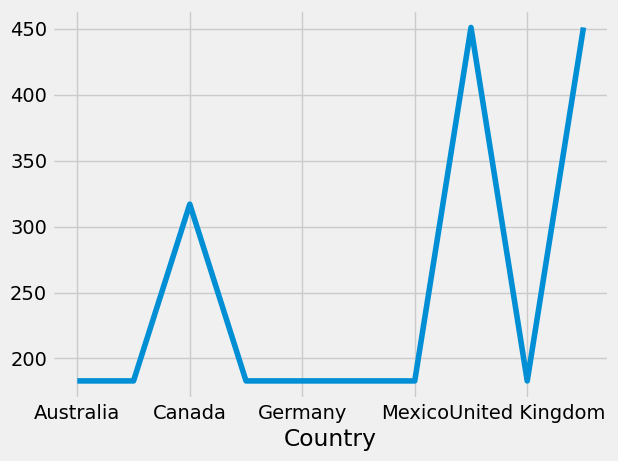

In [45]:
sub_pref_by_country.plot()